In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn.preprocessing import LabelEncoder,StandardScaler

%matplotlib inline

In [2]:
house = pd.read_csv("data.csv")

In [3]:
house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
house.shape

(4600, 18)

In [5]:
house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
house.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

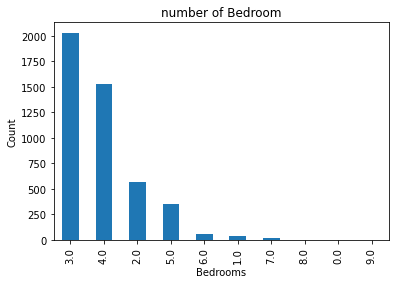

In [8]:
house['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.savefig("C://Users//debaj//Desktop//Project Practis//house_price/bedroom.png")
plt.show()

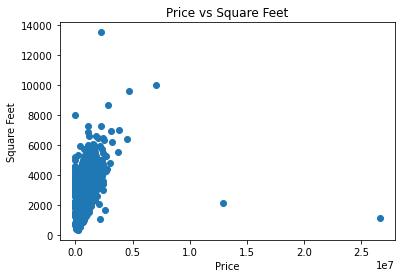

In [9]:
plt.scatter(house.price,house.sqft_living)
plt.title("Price vs Square Feet")
plt.ylabel('Square Feet')
plt.xlabel('Price')
plt.savefig("C://Users//debaj//Desktop//Project Practis//house_price/price_squarefeet.png")
plt.show()

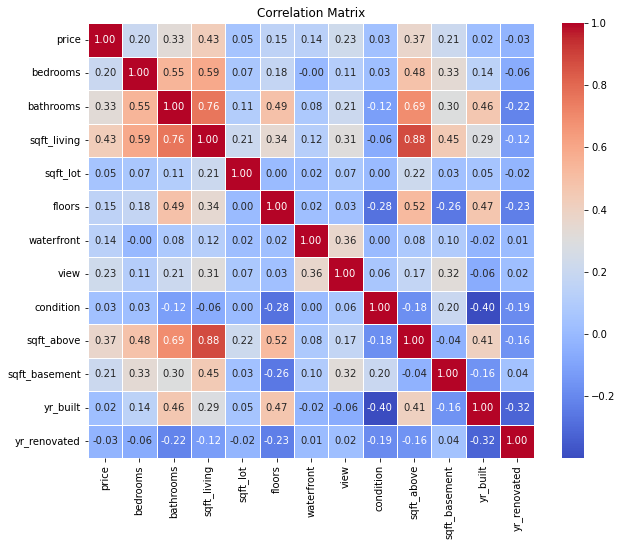

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'house' is your pandas DataFrame
# Replace this with your actual DataFrame name if different

# Compute the correlation matrix
correlation_matrix = house.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


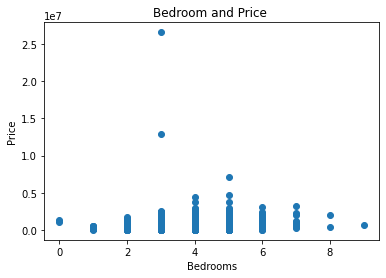

In [11]:
plt.scatter(house.bedrooms,house.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

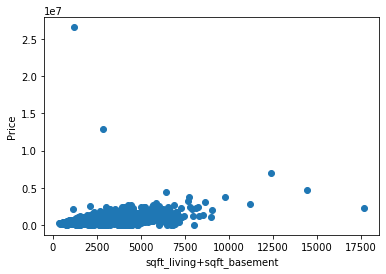

In [12]:
plt.scatter((house['sqft_living']+house['sqft_basement']),house['price'])
plt.ylabel("Price")
plt.xlabel("sqft_living" +"+"+ "sqft_basement")
plt.show()


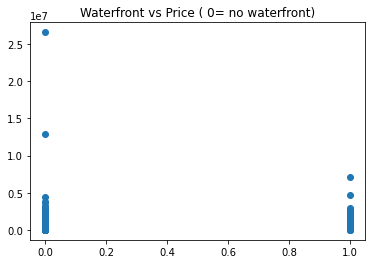

In [13]:
plt.scatter(house.waterfront,house.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")
plt.show()

In [14]:
train1 = house.drop(['price'],axis=1)
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [15]:
train1["floors"].unique()

array([1.5, 2. , 1. , 2.5, 3. , 3.5])

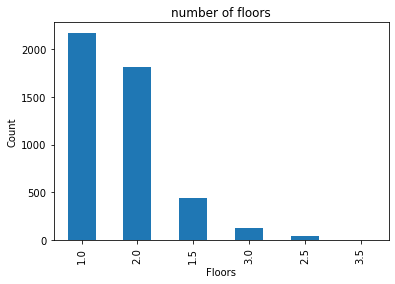

In [16]:
train1['floors'].value_counts().plot(kind='bar')
plt.title('number of floors')
plt.xlabel('Floors')
plt.ylabel('Count')
plt.show()

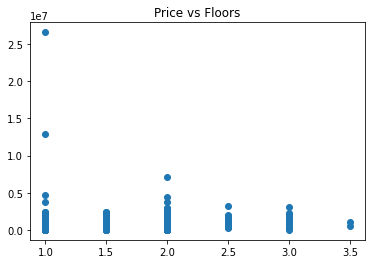

In [17]:
plt.scatter(house.floors,house.price)
plt.title("Price vs Floors")
plt.show()

In [18]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [19]:
house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

Feature Engeneering

In [20]:
labelencoder = LabelEncoder()
house["yr_renovated"]= labelencoder.fit_transform(house["yr_renovated"])
house["yr_built"]= labelencoder.fit_transform(house["yr_built"])
house["street"]= labelencoder.fit_transform(house["street"])
house["city"]= labelencoder.fit_transform(house["city"])
house["statezip"]= labelencoder.fit_transform(house["statezip"])
house["country"]= labelencoder.fit_transform(house["country"])



In [21]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,55,50,1522,36,62,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,21,0,3899,35,58,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,66,0,2291,18,26,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,63,0,4263,3,7,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,76,37,4352,31,31,0


SPLITTTING DATASET

In [22]:
conv_dates = [1 if values == 2014 else 0 for values in house.date ]
house['date'] = conv_dates
x = house.drop(['price'],axis=1)

In [23]:
y = house["price"]

In [24]:
x.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,55,50,1522,36,62,0
1,0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,21,0,3899,35,58,0
2,0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,66,0,2291,18,26,0
3,0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,63,0,4263,3,7,0
4,0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,76,37,4352,31,31,0


In [25]:
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
X_train , X_test , y_train , y_test = train_test_split(x,y,train_size=0.80)

Feature Scaling

In [28]:
standardscaler = StandardScaler()
x_train = standardscaler.fit(X_train)
x_test = standardscaler.fit_transform(X_test)

# Algorithm

In [29]:
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(X_train,y_train)

LinearRegression()

In [30]:
y_predict = linearregression.predict(X_test)

In [31]:
y_predict

array([ 337883.01443724,  542396.49638982,  431767.93822207,
        377944.97356644,  653809.48747362,  292808.87376435,
        866638.23336054,  497100.29349912,  550337.71750682,
        571548.23388898,  644174.91207781, 1020859.54617372,
        487098.49895285,  377510.0845102 ,  352835.37439041,
        799441.58443912,  593907.42526558,  316804.23254078,
        406360.30620746, 1338526.26380383,  505391.0268549 ,
        602855.03992988,  332622.80623147,  206628.40318017,
        670086.08475093,  701838.6553842 ,  726016.37409984,
        426369.21581286,  528757.77809492,  392349.83039951,
        437757.7376126 ,  519153.3217494 ,  268812.55635199,
        641202.45395829, 1180390.92162915,  291065.38110325,
        953250.85761248,  508194.18643937,  367879.57669534,
       1250118.9353955 ,  437465.22911619,  357925.72472586,
        558592.88682463,  533805.16394078,  336900.02952196,
        475297.90870834,  388222.0720378 ,  252140.74417262,
        743182.28516307,

In [32]:
print("Coefficient ",linearregression.coef_ ,"\n")
print("Intercept " ,linearregression.intercept_)

Coefficient  [ 0.00000000e+00 -6.37791020e+04  5.35998320e+04  1.68479350e+02
 -6.01070475e-01  2.71755515e+04  2.82060245e+05  4.34879259e+04
  3.77754336e+04  9.87059100e+01  6.97734399e+01 -2.22799110e+03
  3.86179368e+02 -8.79509021e-01  2.91680298e+03 -1.26145350e+03
  0.00000000e+00] 

Intercept  42606.29207944998


In [33]:
from sklearn.metrics import mean_squared_error , r2_score

In [34]:
print("Mean Square error ",  mean_squared_error(y_test,y_predict))

Mean Square error  71628108360.91077


In [35]:
print("Accuracy",r2_score(y_test,y_predict))

Accuracy 0.5554744086317659


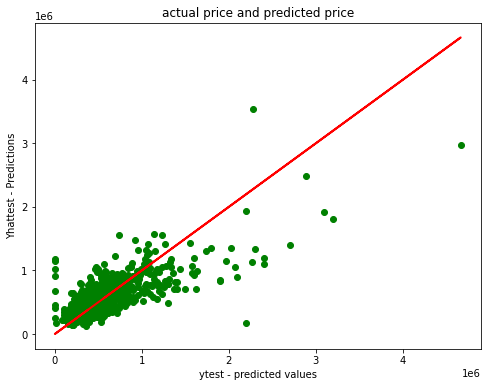

In [36]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict,color = 'green')
plt.xlabel("ytest - predicted values")
plt.ylabel("Yhattest - Predictions")
plt.plot(y_test, y_test, color = 'red', linewidth = 2)
plt.title('actual price and predicted price')
plt.show()

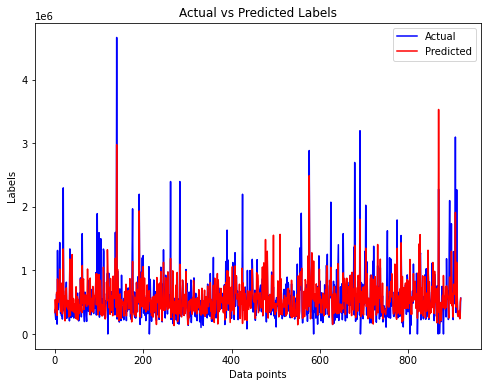

In [37]:
import matplotlib.pyplot as plt

# Assuming you have the predicted labels y_pred and actual labels y_test

# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='b', label='Actual')
plt.plot(range(len(y_test)), y_predict, color='r', label='Predicted')
plt.xlabel('Data points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()


Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model
ridge = Ridge(alpha=1.0)  # You can adjust the regularization parameter alpha

# Fit the model to the training data
ridge.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 71626523858.7458


In [39]:
print("Accuracy",r2_score(y_test,y_pred))

Accuracy 0.555484242086509


In [40]:
len(y_test)

920

In [41]:
len(y_pred)

920

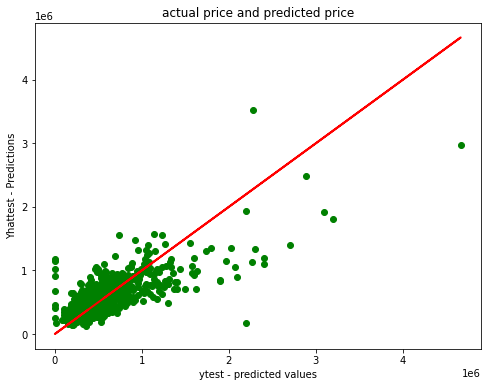

In [42]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,color = 'green')
plt.xlabel("ytest - predicted values")
plt.ylabel("Yhattest - Predictions")
plt.plot(y_test, y_test, color = 'red', linewidth = 2)
plt.title('actual price and predicted price')
plt.show()

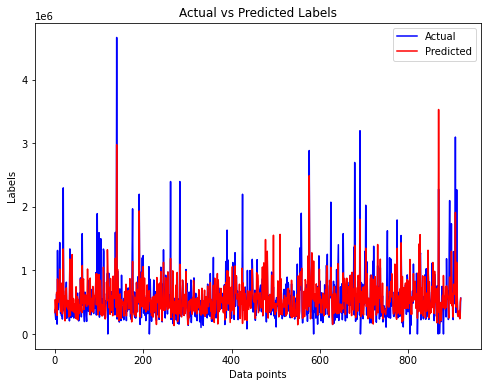

In [43]:
import matplotlib.pyplot as plt

# Assuming you have the predicted labels y_pred and actual labels y_test

# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='b', label='Actual')
plt.plot(range(len(y_test)), y_pred, color='r', label='Predicted')
plt.xlabel('Data points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()


Lasso Regression

In [44]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Create a Lasso regression model
lasso = Lasso(alpha=1.0)  # You can adjust the regularization parameter alpha

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)


Lasso Regression Mean Squared Error: 71628344085.79381


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.627e+13, tolerance: 1.314e+11
  model = cd_fast.enet_coordinate_descent(


In [45]:
print("Accuracy",r2_score(y_test,y_pred_lasso))

Accuracy 0.5554729457180378


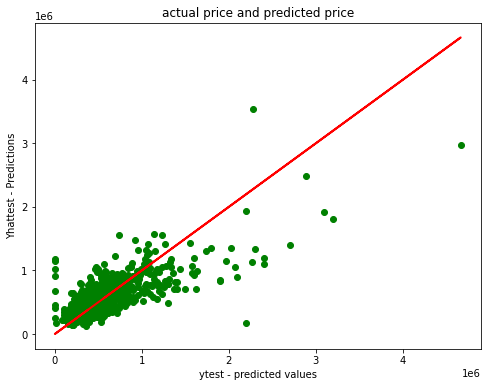

In [46]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso,color = 'green')
plt.xlabel("ytest - predicted values")
plt.ylabel("Yhattest - Predictions")
plt.plot(y_test, y_test, color = 'red', linewidth = 2)
plt.title('actual price and predicted price')
plt.show()

Gradient Boosting Algorithm

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create a Gradient Boosting Regressor model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# You can adjust the number of estimators (trees) and the learning rate

# Fit the model to the training data
gradient_boosting.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gb = gradient_boosting.predict(X_test_scaled)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Regression Mean Squared Error:", mse_gb)


Gradient Boosting Regression Mean Squared Error: 60735049967.70225


In [48]:
print("Accuracy",r2_score(y_test,y_pred_gb))

Accuracy 0.6230769648747876


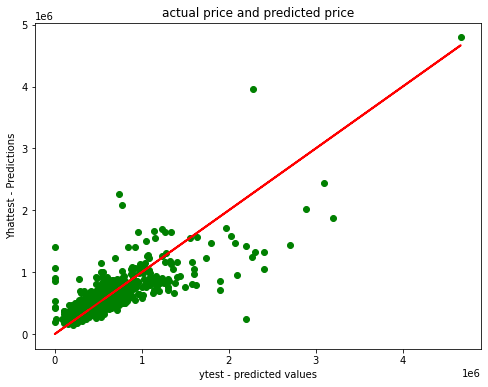

In [49]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb,color = 'green')
plt.xlabel("ytest - predicted values")
plt.ylabel("Yhattest - Predictions")
plt.plot(y_test, y_test, color = 'red', linewidth = 2)
plt.title('actual price and predicted price')
plt.savefig("C://Users//debaj//Desktop//Project Practis//house_price//gradient boosting.png")
plt.show()

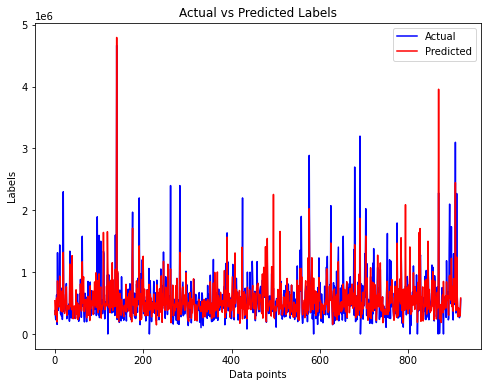

In [50]:
import matplotlib.pyplot as plt

# Assuming you have the predicted labels y_pred and actual labels y_test

# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='b', label='Actual')
plt.plot(range(len(y_test)),y_pred_gb, color='r', label='Predicted')
plt.xlabel('Data points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()